# Tutorial

## Import modules

In [1]:
# -*- coding: UTF-8 -*-

# Render our plots inline
%matplotlib inline 

import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn
import shutil

pd.set_option('display.max_columns', None) # Display all the columns

# Reference for color palettes: http://web.stanford.edu/~mwaskom/software/seaborn/tutorial/color_palettes.html

# Change the font
matplotlib.rcParams.update({'font.family': 'Source Sans Pro'})

In [2]:
from makerlabs import fablabs_io
from makerlabs import diybio_org
from makerlabs import hackerspaces_org

# Load data

In [3]:
flio = fablabs_io.get_labs(format="pandas")

In [4]:
diybio = diybio_org.get_labs(format="pandas", open_cage_api_key="xxxxxxx")

In [5]:
hackerspaces = hackerspaces_org.get_labs(format="pandas", open_cage_api_key="xxxxxxx")

# Check data

In [6]:
flio.head()

,address_1,address_2,address_notes,avatar,blurb,capabilities,city,continent,country,country_code,county,description,email,id,lab_type,latitude,links,longitude,name,phone,postal_code,slug,source,url
123,,,,http://fablabs.io.s3.amazonaws.com/2018/01/31/...,,[],,North America,United States,USA,,,,832,Fab Lab,39.756,"{u'twitter': u'', u'facebook': u''}",-100.713,xyz,,,123,fablabs.io,https://www.fablabs.io/labs/123
1535fablab,"115A, Rue Emile Mark",,,http://fablabs.io.s3.amazonaws.com/2017/01/28/...,,"[three_d_printing, cnc_milling, circuit_produc...",Differdange,Europe,Luxembourg,LUX,,A Fab Lab (Fabrication Laboratory) is an open ...,fablablux@technoport.lu,979,Fab Lab,49.5216,"{u'twitter': u'', u'facebook': u'', 1722: u'ht...",5.89988,1535°C FabLab,+352 545 580 438,L-4620,1535fablab,fablabs.io,https://www.fablabs.io/labs/1535fablab
2188mk,"2188 Maker Space, 2nd Floor, Business Center","Shenzhen Institute of Information Technology, ...",,http://fablabs.io.s3.amazonaws.com/2017/01/28/...,2188 Maker Space is a maker space supported by...,"[three_d_printing, cnc_milling, circuit_produc...",Shenzhen,Asia,China,CHN,Guangdong,2188 Maker Space building as an important goal...,jinyan@sziit.edu.cn,1069,Fab Lab,0,"{1884: u'http://www.2188mk.com', u'twitter': u...",0,Fablab 2188 Maker Space,+86 755 89226685,518172,2188mk,fablabs.io,https://www.fablabs.io/labs/2188mk
36incfablab,City Center Mall,3rd floor,Go up the escalator to the third floor.,http://fablabs.io.s3.amazonaws.com/2017/01/28/...,Part of the State of Chhattisgarh Incubator.,"[three_d_printing, cnc_milling, circuit_produc...",Raipur,Asia,India,IND,CG,36 Inc is the Technology and Business Incubato...,ceochips@nic.in,1092,Fab Lab,0,"{1940: u'http://36inc.gov.in/fablab', u'twitte...",0,36 Inc Fablab,+91-771-4014158,492001,36incfablab,fablabs.io,https://www.fablabs.io/labs/36incfablab
3dbell,"Via Giovanni Amendola, n.9",,,http://fablabs.io.s3.amazonaws.com/2017/01/28/...,"""da IDEA a MATERIA""",[three_d_printing],Mercato San Severino,Europe,Italy,ITA,Salerno,,info@3dbell.it,925,Fab Lab,40.7846,"{u'twitter': u'', 1619: u'http://www.3dbell.it...",14.7605,3DBell FabLab,0899764122,84085,3dbell,fablabs.io,https://www.fablabs.io/labs/3dbell


In [7]:
diybio.head()

,address_1,city,continent,country,country_code,county,lab_type,latitude,longitude,name,postal_code,slug,source,state,url
berkeleybiolabs.com/,,Berkeley,North America,United States of America,USA,Alameda County,DIYBio Lab,37.8708,-122.273,berkeleybiolabs.com/,None,berkeleybiolabs.com/,diybio.org,California,http://berkeleybiolabs.com/
bioartlab.com/,,Eindhoven,Europe,The Netherlands,NLD,None,DIYBio Lab,51.4486,5.45012,bioartlab.com/,None,bioartlab.com/,diybio.org,North Brabant,http://bioartlab.com/
bioclub.org/,,Tokyo,Asia,Japan,JPN,None,DIYBio Lab,34.2256,139.295,bioclub.org/,None,bioclub.org/,diybio.org,Tokyo,http://www.bioclub.org/
biocurious.org/,,Sunnyvale,North America,United States of America,USA,Santa Clara County,DIYBio Lab,37.3688,-122.036,biocurious.org/,None,biocurious.org/,diybio.org,California,http://biocurious.org/
biodidact.net/,,Los Alamos,North America,United States of America,USA,Los Alamos County,DIYBio Lab,35.8814,-106.299,biodidact.net/,None,biodidact.net/,diybio.org,New Mexico,http://biodidact.net/


In [8]:
hackerspaces.head()

,address_1,city,continent,country,country_code,county,email,equipment,eventbrite,facebook,fee,flickr,forum,founding,googleplus,ical,irc,jabber,lab_type,latitude,logo,longitude,maillist,membercount,phone,postal_code,site,size,source,state,status,text,twitter,ustream,wiki,youtube
name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"""Portsmouth_Makerspace""",NaN,NaN,NaN,NaN,NaN,NaN,portsmouthmakerspace@groups.facebook.com,NaN,NaN,https://www.facebook.com/groups/portsmouthmake...,"Currently there is no fee, as meetings have no...",NaN,NaN,2017/01/05,NaN,NaN,NaN,NaN,Hackerspace,NaN,Makerspace Picture Linkedin.jpg,NaN,NaN,13,NaN,NaN,NaN,NaN,hackerspaces.org,NaN,building,\nOfficial group of the first Portsmouth (UK) ...,NaN,NaN,NaN,NaN
*.*,None None,None,None,None,None,None,josagal8@gmail.com,NaN,NaN,NaN,NaN,NaN,NaN,2011/07/14,NaN,NaN,NaN,NaN,Hackerspace,None,NaN,None,josagal8@gmail.com,1,6057138**,None,NaN,NaN,hackerspaces.org,None,planned,,NaN,NaN,NaN,NaN
-RWebLAB,Cami des Castell,Maó,Europe,Spain (territorial waters),ESP,Menorca,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hackerspace,39.8856,NaN,4.26835,NaN,3,NaN,07702,http://sevilleta.es,NaN,hackerspaces.org,Balearic Islands,building,\n-RWebLAB is a server-based hacklab from Spai...,NaN,NaN,http://wiki.sevilleta.es,NaN
..::c0re1ndustries::..,,Labu,Asia,PRC,CHN,Chindu County,thetanktheory@gmail.com,NaN,NaN,NaN,NA,NaN,NaN,2010/01/26,NaN,NaN,NaN,NaN,Hackerspace,33.2664,NaN,97.1388,http://www.facebook.com/group.php?gid=44679852...,13,NaN,None,www.c0re1ndustries.com,NA,hackerspaces.org,Qinghai,planned,\nI am looking for a group of like-minded indi...,NaN,NaN,www.c0re.wikia.com,NaN
/dev/base,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017/08/18,NaN,NaN,NaN,NaN,Hackerspace,NaN,NaN,NaN,NaN,5,NaN,NaN,NaN,NaN,hackerspaces.org,NaN,building,,NaN,NaN,NaN,NaN


# Save data to csv

In [9]:
flio.to_csv("flio.csv", encoding='utf-8')

In [10]:
hackerspaces.to_csv("hs.csv", encoding='utf-8')

In [11]:
diybio.to_csv("diybio.csv", encoding='utf-8')

# Analyse data

In [12]:
flio["country_code"].unique()

array([u'USA', u'LUX', u'CHN', u'IND', u'ITA', u'DEU', u'BRA', u'ARG',
       u'KOR', u'FRA', u'KAZ', u'ECU', u'SVK', u'RWA', u'BEL', u'POL',
       u'GEO', u'AUT', u'DNK', u'RUS', u'LBN', u'SGP', u'CAN', u'GUF',
       u'TWN', u'KWT', u'ESP', u'FIN', u'PRT', u'TUR', u'PHL', u'IRN',
       u'KHM', u'KEN', u'JPN', u'EGY', u'CHE', u'COL', u'CIV', u'GBR',
       u'NLD', u'BEN', u'SAU', u'ZAF', u'MAR', u'TTO', u'SEN', u'SRB',
       u'BGD', u'NZL', u'CMR', u'PAN', u'TUN', u'MLI', u'THA', u'SLV',
       u'HRV', u'CHL', u'ETH', u'AUS', u'AFG', u'ISL', u'JOR', u'MEX',
       u'GRC', u'PER', u'BHR', u'IDN', u'CZE', u'ROU', u'HUN', u'VNM',
       u'PRY', u'ARE', u'ISR', u'LTU', u'PAK', u'MYS', u'LVA', u'IRL',
       u'SVN', u'NOR', u'PSE', u'PRI', u'QAT', u'REU', u'SUR', u'SWE',
       u'MLT', u'CRI', u'NAM', u'UKR', u'NGA', u'BFA', u'OMN', u'BOL',
       u'HKG', u'GTM', u'GLP', u'MNE', u'MAC', u'URY', u'BGR', u'GHA',
       u'TGO', u'JAM'], dtype=object)

In [13]:
flio["country_code"].value_counts()

USA    170
FRA    155
ITA    134
ESP     49
DEU     47
IND     45
GBR     41
BRA     40
NLD     32
RUS     31
GEO     25
CAN     23
CHN     21
BEL     19
PRT     19
CHE     18
KOR     17
JPN     17
MEX     15
POL     13
TWN     13
PER     12
ARG     12
SAU     10
EGY      9
AUT      9
CHL      8
ZAF      8
TUR      8
COL      8
      ... 
SUR      1
BOL      1
BGR      1
PSE      1
TGO      1
PAK      1
GUF      1
TTO      1
BGD      1
MNE      1
OMN      1
ETH      1
HRV      1
MYS      1
NGA      1
NAM      1
SLV      1
ROU      1
GTM      1
HKG      1
SWE      1
KHM      1
PAN      1
AFG      1
JAM      1
HUN      1
URY      1
MLT      1
THA      1
MAC      1
Name: country_code, Length: 106, dtype: int64

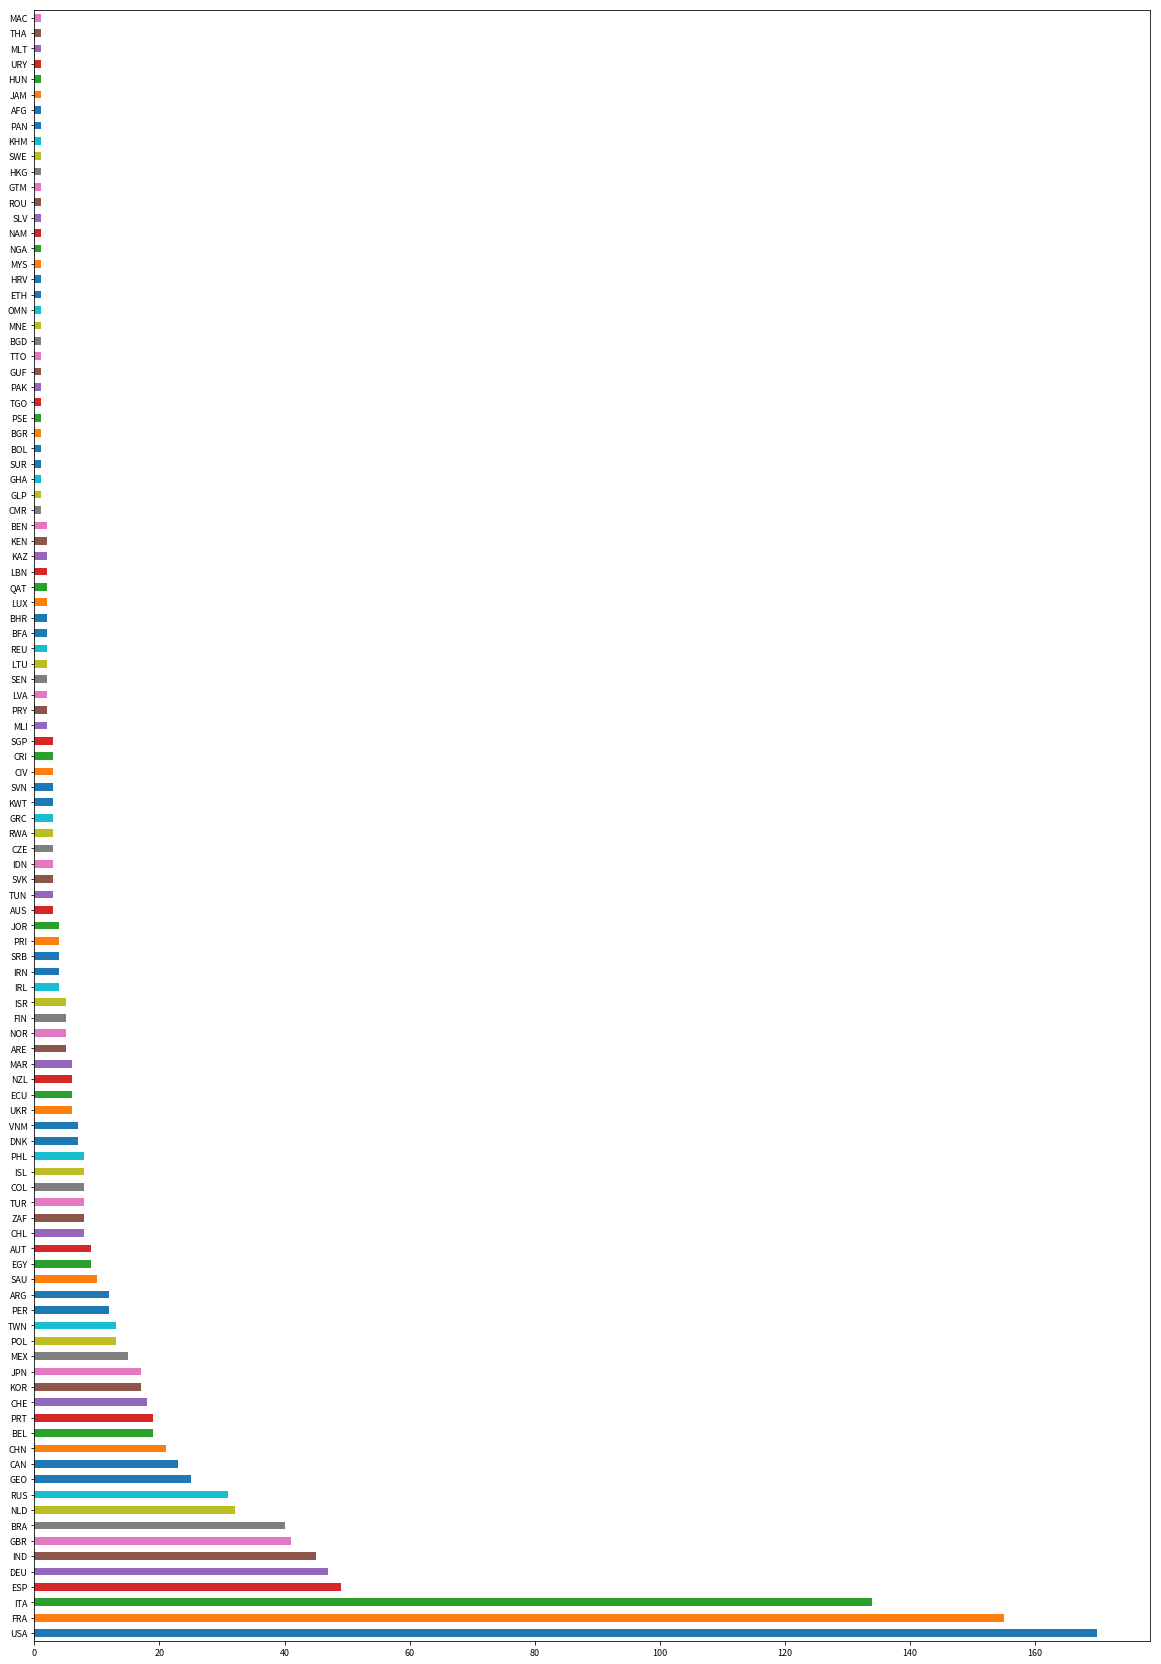

In [14]:
flio["country_code"].value_counts().plot(kind="barh", figsize=(20,30))

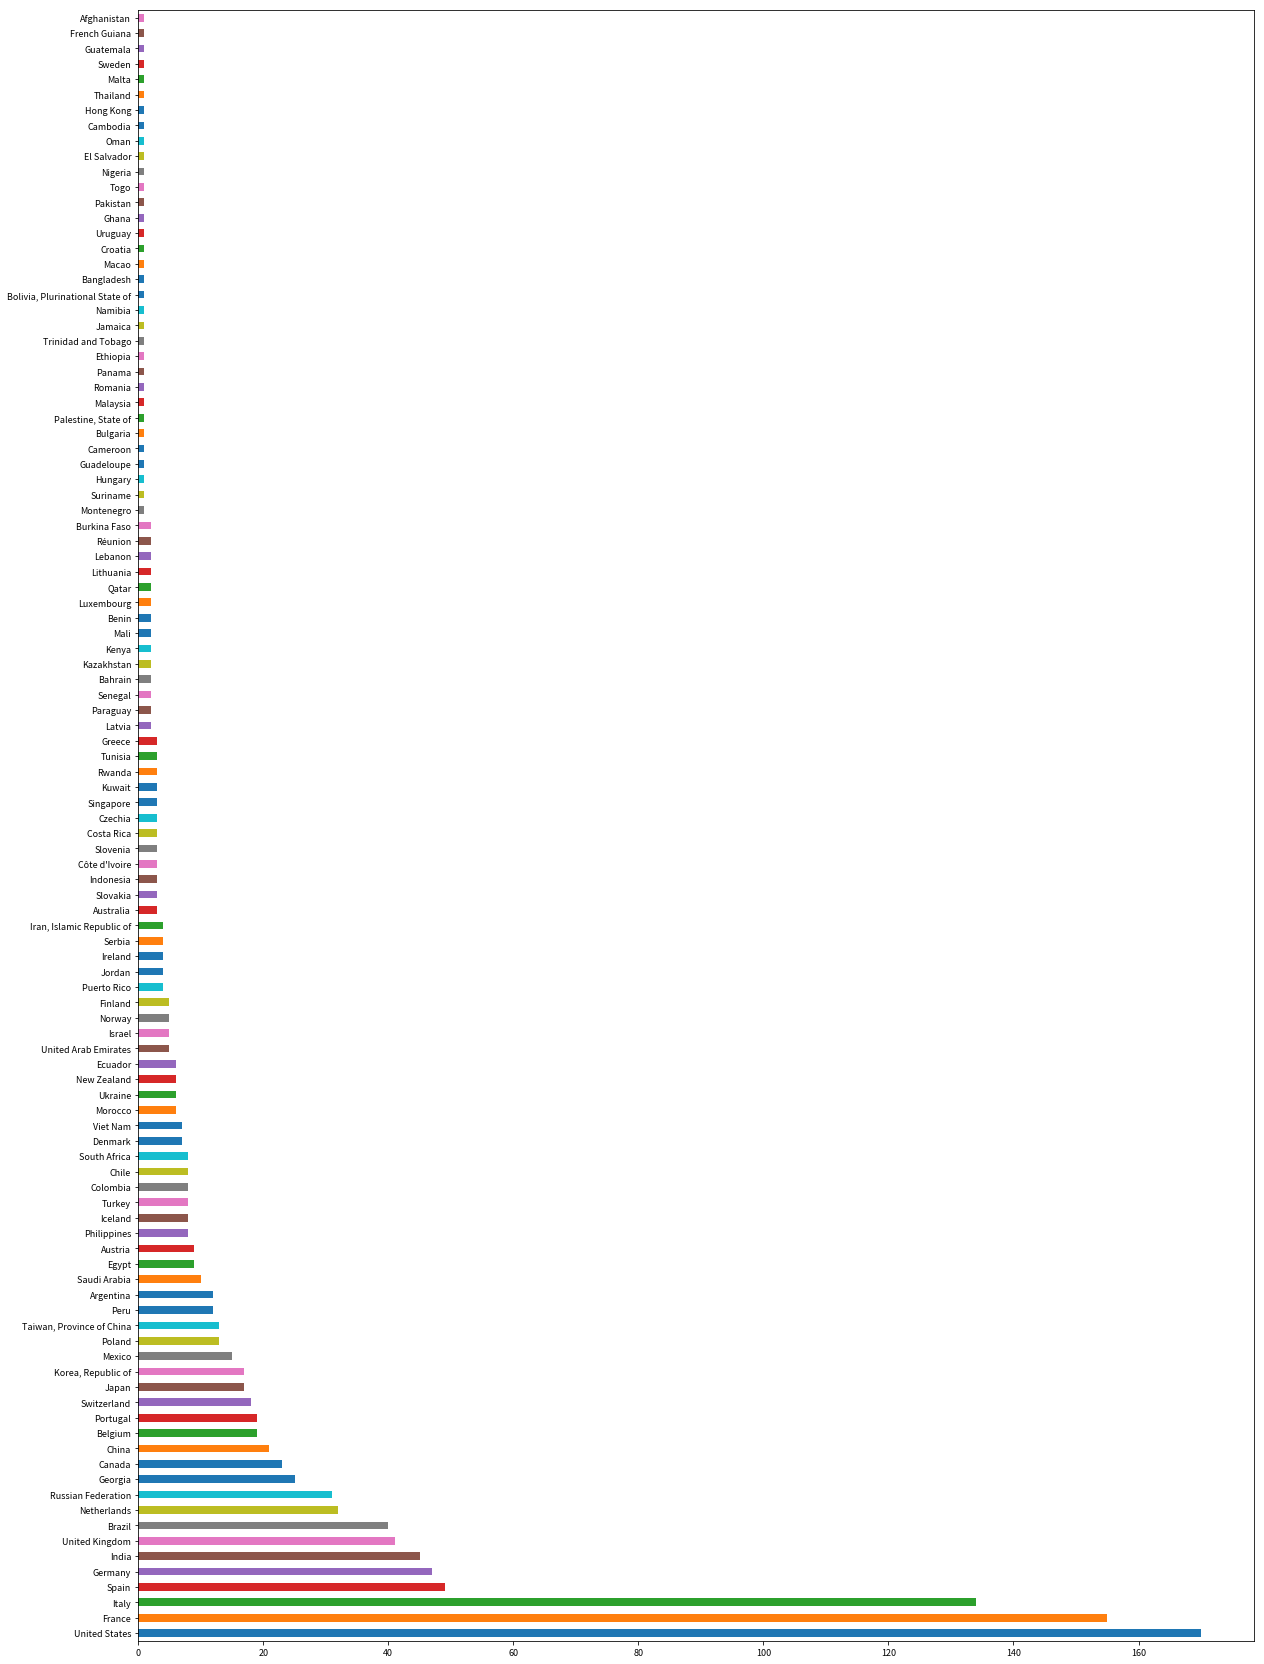

In [15]:
flio["country"].value_counts().plot(kind="barh", figsize=(20,30))

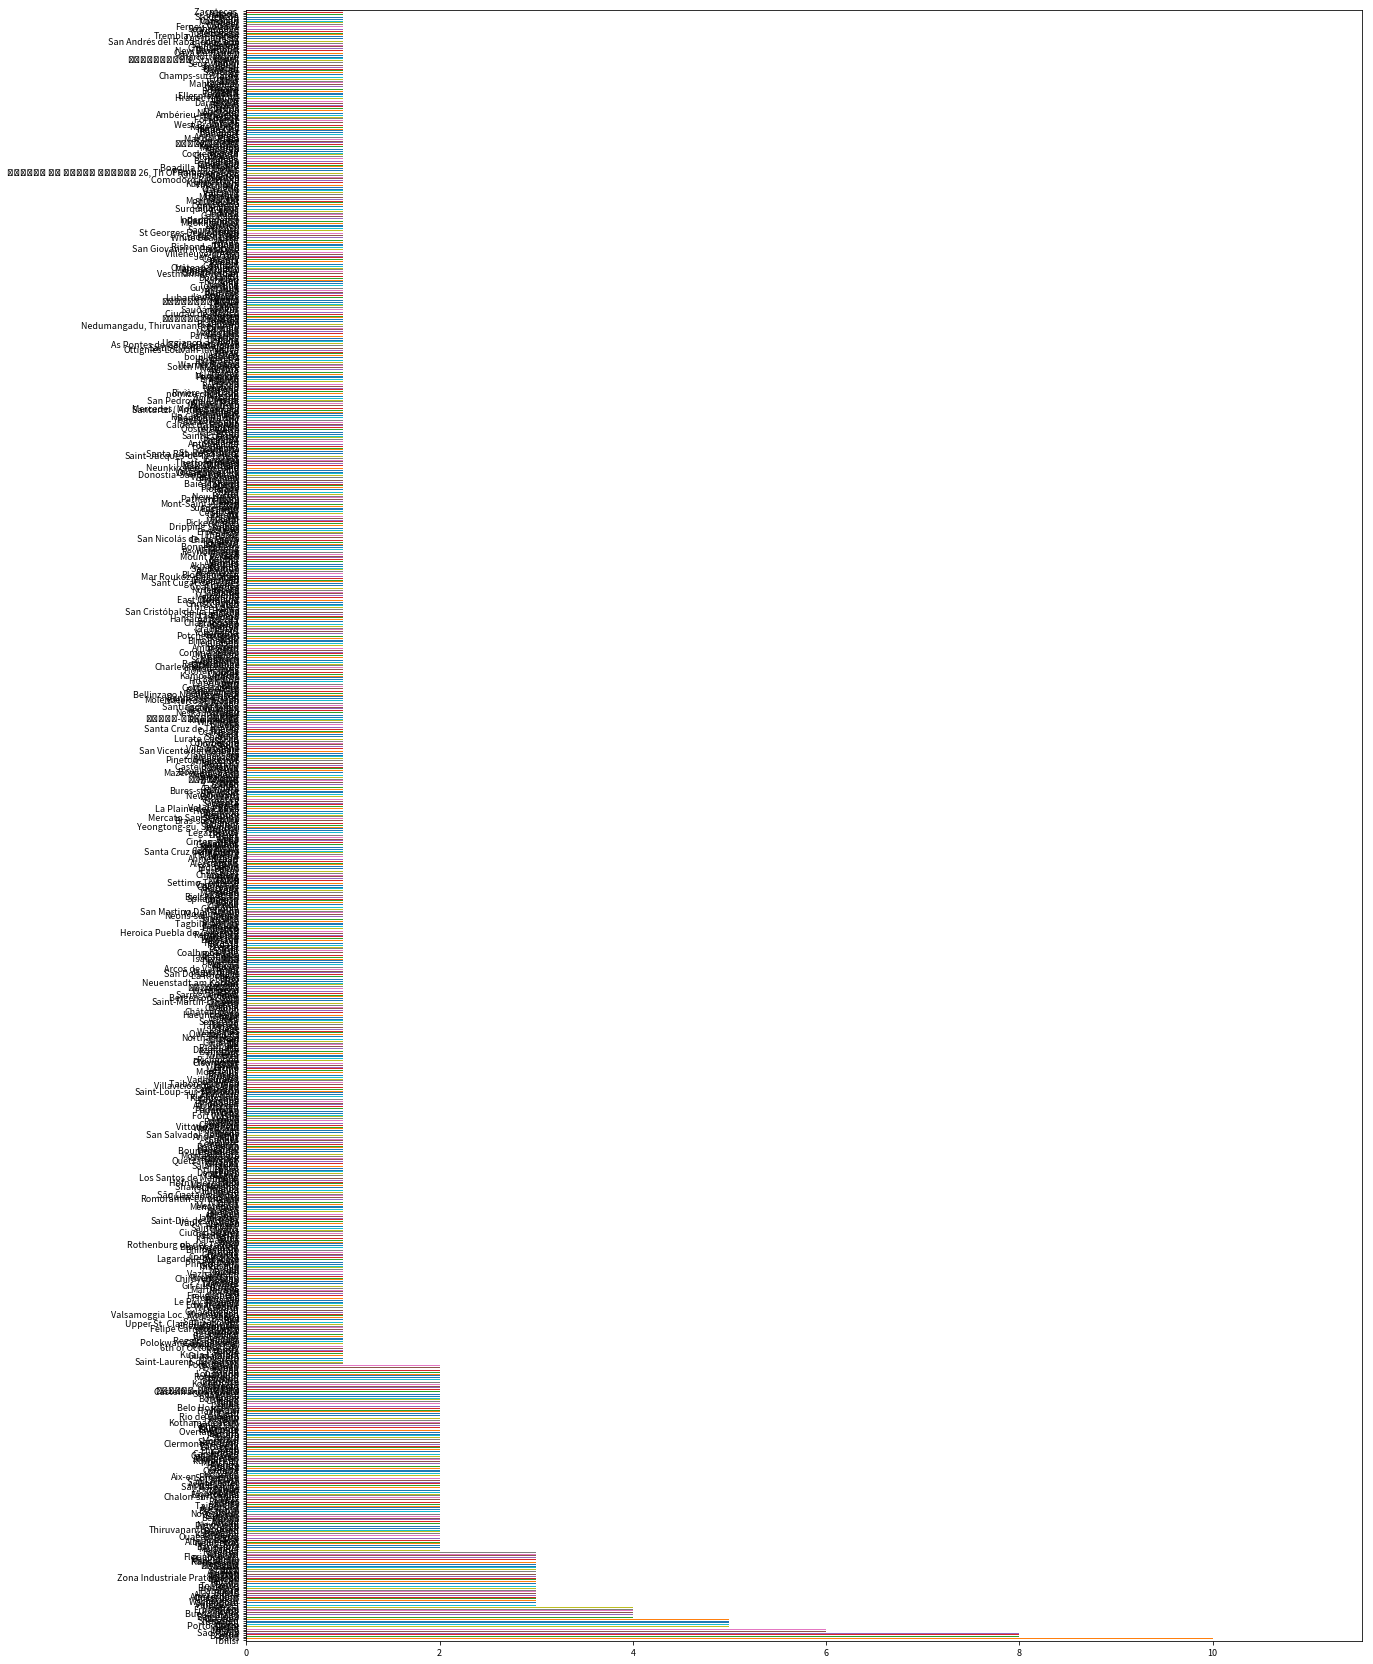

In [16]:
flio["city"].value_counts().plot(kind="barh", figsize=(20,30))

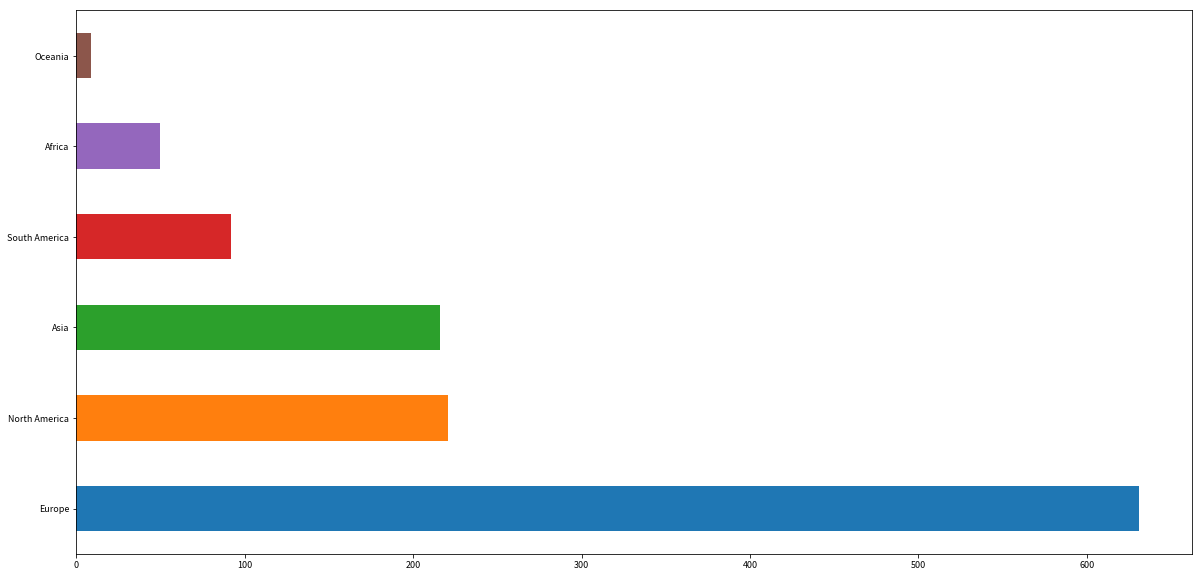

In [17]:
flio["continent"].value_counts().plot(kind="barh", figsize=(20,10))

# Data export for the MakerSpacesRadar

In [18]:
# Concatenate the three DataFrames, in order to handle global data
total_data = pd.concat([flio, diybio, hackerspaces])

## 00.csv

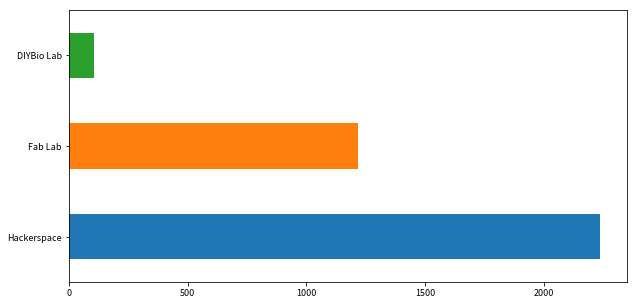

In [19]:
# Number of each type of labs
number_of_labs = total_data["lab_type"].value_counts()
number_of_labs.plot(kind="barh", figsize=(10,5))

In [20]:
# number_of_labs is a Series, convert it into a DataFrame with a cluster column and save it
csv0 = pd.DataFrame()
csv0["count"] = number_of_labs
csv0["lab_type"] = number_of_labs.index
csv0.insert(0, "cluster", "total")
csv0.set_index('cluster', inplace=True)
csv0 = csv0[["lab_type", "count"]]

In [21]:
csv0

,lab_type,count
cluster,,
total,Hackerspace,2238
total,Fab Lab,1219
total,DIYBio Lab,104


In [22]:
csv0.to_csv("00.csv", encoding='utf-8')

## 01.csv

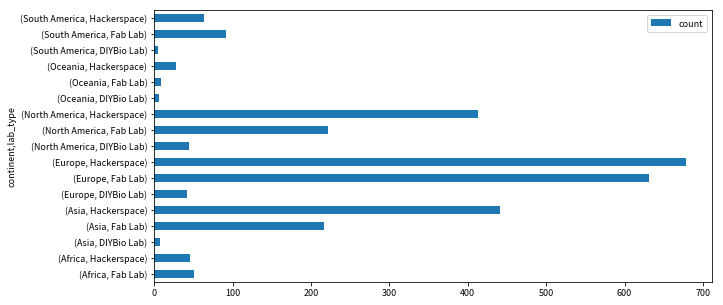

In [23]:
# Number of each type of labs per continent
csv1 = total_data.groupby(['continent', 'lab_type']).size().to_frame('count')
csv1.plot(kind="barh", figsize=(10,5))

In [24]:
csv1

count
continent     lab_type          
Africa        Fab Lab         50
              Hackerspace     46
Asia          DIYBio Lab       7
              Fab Lab        216
              Hackerspace    441
Europe        DIYBio Lab      42
              Fab Lab        631
              Hackerspace    678
North America DIYBio Lab      44
              Fab Lab        221
              Hackerspace    413
Oceania       DIYBio Lab       6
              Fab Lab          9
              Hackerspace     28
South America DIYBio Lab       5
              Fab Lab         92
              Hackerspace     63

In [25]:
csv1.to_csv("01.csv", encoding='utf-8', header=True)

## 02.csv

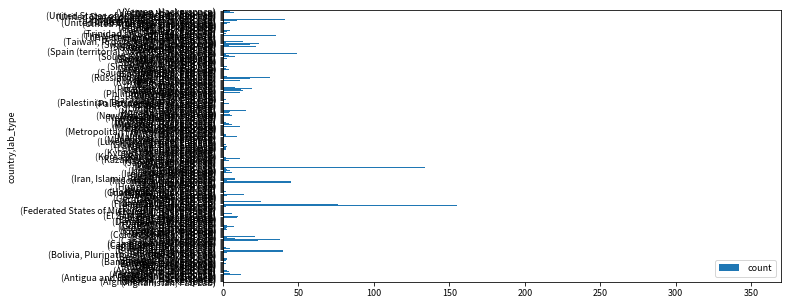

In [26]:
# Number of each type of labs per country
csv2 = total_data.groupby(['country', 'lab_type']).size().to_frame('count')
csv2.plot(kind="barh", figsize=(10,5))

In [27]:
csv2.head()

count
country             lab_type          
Afghanistan         Fab Lab          1
                    Hackerspace      1
Albania             Hackerspace      1
Algeria             Hackerspace      4
Antigua and Barbuda Hackerspace      1

In [28]:
csv2.to_csv("02.csv", encoding='utf-8', header=True)

## 03.csv

In [29]:
# Number of each type of labs per city
csv3 = total_data.groupby(['city', 'lab_type']).size().to_frame('count')

In [30]:
csv3.tail()

,,count
city,lab_type,
西安市,Fab Lab,1
贵阳,Fab Lab,1
阿热勒乡,Hackerspace,1
대구광역시,Fab Lab,1
서울특별시,Fab Lab,3


In [31]:
csv3.sort_values(by="count").head()

count
city            lab_type          
Lublin          Fab Lab          1
Norfolk         Fab Lab          1
                DIYBio Lab       1
Noida           Hackerspace      1
Nizhny Novgorod Hackerspace      1

In [32]:
csv3.to_csv("03.csv", encoding='utf-8', header=True)

## 04.csv

In [33]:
# Count labs
csv4 = flio.groupby(["country", "country_code"])['country'].count().reset_index(name="count").set_index("country")

In [34]:
# Reorder columns for plotly
csv4 = csv4[["count", "country_code"]]

In [35]:
# Check the data
csv4.head()

,count,country_code
country,,
Afghanistan,1,AFG
Argentina,12,ARG
Australia,3,AUS
Austria,9,AUT
Bahrain,2,BHR


In [36]:
# Save file
csv4.to_csv("04.csv", encoding='utf-8', header=True)

## 05.csv

In [37]:
# Count labs
csv5 = hackerspaces.groupby(["country", "country_code"])['country'].count().reset_index(name="count").set_index("country")

In [38]:
# Reorder columns for plotly
csv5 = csv5[["count", "country_code"]]

In [39]:
# Check the data
csv5.head()

,count,country_code
country,,
Afghanistan,1,AFG
Albania,1,ALB
Algeria,4,DZA
Antigua and Barbuda,1,ATG
Argentina,5,ARG


In [40]:
# Save file
csv5.to_csv("05.csv", encoding='utf-8', header=True)

## 06.csv

In [41]:
# Count labs
csv6 = diybio.groupby(["country", "country_code"])['country'].count().reset_index(name="count").set_index("country")

In [42]:
# Reorder columns for plotly
csv6 = csv6[["count", "country_code"]]

In [43]:
# Check the data
csv6.head()

,count,country_code
country,,
Argentina,1,ARG
Australia,4,AUS
Austria,1,AUT
Belgium,3,BEL
Brazil,3,BRA


In [44]:
# Save file
csv6.to_csv("06.csv", encoding='utf-8', header=True)